# Australian Geoscience Datacube
## Feature Summary Examples

The [Australian Geoscience Datacube](https://github.com/data-cube/agdc-v2) provides an integrated gridded data analysis environment for decades of analysis ready earth observation satellite and related data from multiple satellite and other acquisition systems.

For instructions on using the Datacube on NCI, see: http://agdc-v2.readthedocs.io/en/develop/nci_usage.html

For instructions on setting up your own instance, see: http://agdc-v2.readthedocs.io/en/develop/install.html

This notebook touches briefly on some the implimented features of the Datacube module, and is only intended to deomstrat functionality rather than be a tutorial.

In [1]:
%matplotlib inline
import datacube

If you have set up your config correctly, or are using the module on NCI, you should be able to make `Datacube` object that can connects to the configured datacube system.

In [2]:
dc = datacube.Datacube(app='dc-example')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://simonaoliver@:5432/datacube)>>>

## Datacube products and measurements
The Datacube provides pandas.DataFrame representations of the available products and measurements:

In [3]:
dc.list_products()

,name,description,platform,product_type,instrument,format,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,
1,ls5_satellite_telemetry_data,Landsat 5 Satellite Telemetry Data,LANDSAT_5,satellite_telemetry_data,TM,NaN,NaN,NaN,NaN,NaN
2,ls5_level1_scene,Landsat 5 Level 1 At-sensor Radiance 25 metre,LANDSAT_5,level1,TM,GeoTiff,NaN,NaN,NaN,NaN
3,ls5_nbar_scene,Landsat 5 NBAR 25 metre,LANDSAT_5,nbar,TM,GeoTiff,NaN,NaN,NaN,NaN
4,ls5_nbart_scene,Landsat 5 NBART 25 metre,LANDSAT_5,nbart,TM,GeoTiff,NaN,NaN,NaN,NaN
5,ls5_pq_scene,Landsat 5 PQ 25 metre,LANDSAT_5,pqa,TM,GeoTiff,NaN,NaN,NaN,NaN
6,ls5_ledaps_scene,Landsat 5 LEDAPS 25 metre,LANDSAT_5,ledaps,TM,GeoTiff,NaN,NaN,NaN,NaN
7,ls7_satellite_telemetry_data,Landsat 7 Satellite Telemetry Data,LANDSAT_7,satellite_telemetry_data,ETM,NaN,NaN,NaN,NaN,NaN
8,ls7_level1_scene,Landsat 7 Level 1 At-sensor Radiance 25 metre,LANDSAT_7,level1,ETM,GeoTiff,NaN,NaN,NaN,NaN
9,ls7_nbar_scene,Landsat 7 NBAR 25 metre,LANDSAT_7,nbar,ETM,GeoTiff,NaN,NaN,NaN,NaN


## Datacube Measurements
The list of measurements stored in the datacube can also be listed.

Measurements are also known as _bands_ in the imagery domain, and _data variables_ when stored in NetCDF files or when working with `xarray.Dataset` objects.

In [4]:
dc.list_measurements()

aliases  \
product              measurement                                            
ls5_nbar_scene       1                                     [band_1, blue]   
                     2                                    [band_2, green]   
                     3                                      [band_3, red]   
                     4                                      [band_4, nir]   
                     5                                    [band_5, swir1]   
                     7                                    [band_7, swir2]   
ls5_nbart_scene      1                                     [band_1, blue]   
                     2                                    [band_2, green]   
                     3                                      [band_3, red]   
                     4                                      [band_4, nir]   
                     5                                    [band_5, swir1]   
                     7                                    [band_7, swir2]   
ls5_pq_scene         pqa                              [qa_flags, quality]   
ls5_ledaps_scene     sr_band1                              [band_1, blue]   
                     sr_band2                             [band_2, green]   
                     sr_band3                               [band_3, red]   
                     sr_band4                               [band_4, nir]   
                     sr_band5                             [band_5, swir1]   
                     sr_band7                             [band_7, swir2]   
                     cfmask                                [mask, CFmask]   
                     cfmask_conf                            [mask_config]   
                     sr_adjacent_cloud_qa                [adjacent_cloud]   
                     sr_atmos_opacity      [atmospheric_opacity, opacity]   
                     sr_cloud_qa                                  [cloud]   
                     sr_cloud_shadow_qa                    [cloud_shadow]   
                     sr_ddv_qa                                      [ddv]   
                     sr_fill_qa                                    [fill]   
                     sr_land_water_qa                        [land_water]   
                     sr_snow_qa                                    [snow]   
ls7_nbar_scene       1                                     [band_1, blue]   
...                                                                   ...   
h8_ahi_obs_granule   15_2000                                    [band_15]   
                     16_2000                                    [band_16]   
h8_ahi_solar_granule SOLAR_1000                                       NaN   
                     SOLAR_2000                                       NaN   
                     SOLAR_500                                        NaN   
ls5_nbar_albers      blue                                  [band_1, blue]   
                     green                                [band_2, green]   
                     red                                    [band_3, red]   
                     nir                                    [band_4, nir]   
                     swir1                                [band_5, swir1]   
                     swir2                                [band_7, swir2]   
ls5_nbart_albers     blue                                  [band_1, blue]   
                     green                                [band_2, green]   
                     red                                    [band_3, red]   
                     nir                                    [band_4, nir]   
                     swir1                                [band_5, swir1]   
                     swir2                                [band_7, swir2]   
ls5_pq_albers        pixelquality                     [qa_flags, quality]   
ls7_nbar_albers      blue                                  [band_1, blue]   
                     green                                [ban

## Retrieving data


In [28]:
nbar = dc.load(product='ls7_nbart_albers', x=(150., 150.5), y=(-34.75, -34.25))

The returned data is an `xarray.Dataset` object, which is a labelled n-dimensional array wrapping a `numpy` array.

We can investigate the data to see the variables (measurement bands) and dimensions that were returned:

In [29]:
nbar

<xarray.Dataset>
Dimensions:  (time: 1, x: 2129, y: 2466)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-12T23:51:12
  * y        (y) float64 -3.855e+06 -3.855e+06 -3.855e+06 -3.855e+06 ...
  * x        (x) float64 1.637e+06 1.637e+06 1.637e+06 1.637e+06 1.637e+06 ...
Data variables:
    blue     (time, y, x) int16 371 -999 -999 -999 360 327 324 353 384 339 ...
    green    (time, y, x) int16 569 -999 -999 -999 536 484 496 525 589 559 ...
    red      (time, y, x) int16 758 671 -999 -999 693 603 570 581 679 639 ...
    nir      (time, y, x) int16 2321 2393 -999 -999 2501 2516 2532 2520 2590 ...
    swir1    (time, y, x) int16 2124 1830 1875 2062 1981 1870 1854 1862 2146 ...
    swir2    (time, y, x) int16 1230 1029 1081 1124 1033 1023 1033 1008 1163 ...
Attributes:
    crs: EPSG:3577

We can look at the data by name directly, or through the `data_vars` dictionary:

In [30]:
nbar.data_vars

Data variables:
    blue     (time, y, x) int16 371 -999 -999 -999 360 327 324 353 384 339 ...
    green    (time, y, x) int16 569 -999 -999 -999 536 484 496 525 589 559 ...
    red      (time, y, x) int16 758 671 -999 -999 693 603 570 581 679 639 ...
    nir      (time, y, x) int16 2321 2393 -999 -999 2501 2516 2532 2520 2590 ...
    swir1    (time, y, x) int16 2124 1830 1875 2062 1981 1870 1854 1862 2146 ...
    swir2    (time, y, x) int16 1230 1029 1081 1124 1033 1023 1033 1008 1163 ...

In [31]:
nbar.green

<xarray.DataArray 'green' (time: 1, y: 2466, x: 2129)>
array([[[ 569, -999, -999, ..., -999, -999, -999],
        [ 534,  484,  463, ..., 2502, 2764, 3004],
        [ 581,  597,  624, ..., 2799, 3115, 3258],
        ..., 
        [ 438,  515,  544, ...,  785,  719,  778],
        [ 637,  808,  866, ...,  688,  685,  657],
        [1178, 1309, 1170, ...,  678,  690,  591]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2015-12-12T23:51:12
  * y        (y) float64 -3.855e+06 -3.855e+06 -3.855e+06 -3.855e+06 ...
  * x        (x) float64 1.637e+06 1.637e+06 1.637e+06 1.637e+06 1.637e+06 ...
Attributes:
    units: 1
    crs: EPSG:3577
    nodata: -999
    spectral_definition: {u'wavelength': [500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 55

## Plotting data
We can select the data at a particular time and see what is there. We can use pandas-style labels to select a time period, inclusive of the end label:

In [32]:
autumn = nbar.green.loc['1991-3':'2017-5']
autumn.shape

(1, 2466, 2129)

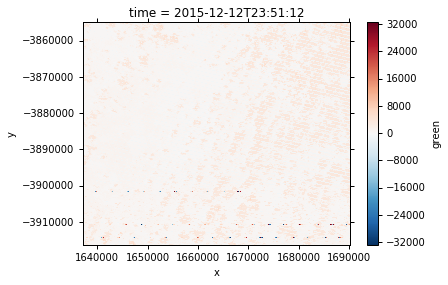

In [33]:
autumn.plot()

## Masking out NO_DATA values
When there is no data availaible, such as on the boundaries of a scene, it is filled in with a special value.
We can use filter it out, although xarray will convert the data from `int` to `float` so that it can use `NaN` to indicate no data.

Now that bad values are no longer represented as `-9999`, the data fits on a much better colour ramp:

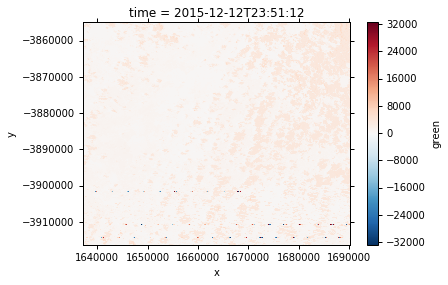

In [34]:
autumn_valid = autumn.where(autumn != autumn.attrs['nodata'])
autumn_valid.plot()

## Masking out cloud
Some of the images are clearly clouds, we should remove them.  There is a product with detected clouds called **PQ** (for Pixel Quality) we can use to mask out the clouds.

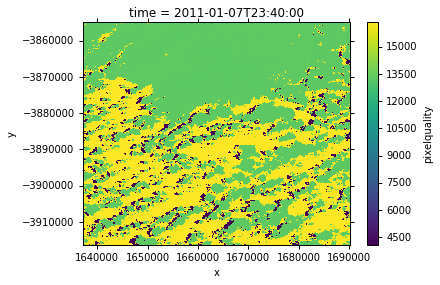

In [21]:
pq = dc.load(product='ls5_pq_albers', x=(150., 150.5), y=(-34.75, -34.25))
pq_autumn = pq.pixelquality.loc['1991-3':'2017-5']
pq_autumn.plot()

The PQ layer stores a bitmask of several values. We can list the information available:

In [26]:
from datacube.storage import masking
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')

,values,bits,description
blue_saturated,"{u'1': False, u'0': True}",0,Blue band is saturated
cloud_acca,"{u'1': u'no_cloud', u'0': u'cloud'}",10,Cloud Shadow (ACCA)
cloud_fmask,"{u'1': u'no_cloud', u'0': u'cloud'}",11,Cloud (Fmask)
cloud_shadow_acca,"{u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}",12,Cloud Shadow (ACCA)
cloud_shadow_fmask,"{u'1': u'no_cloud_shadow', u'0': u'cloud_shadow'}",13,Cloud Shadow (Fmask)
contiguous,"{u'1': True, u'0': False}",8,All bands for this pixel contain non-null values
ga_good_pixel,{u'16383': True},"[13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]",Best Quality Pixel
green_saturated,"{u'1': False, u'0': True}",1,Green band is saturated
land_sea,"{u'1': u'land', u'0': u'sea'}",9,Land or Sea
nir_saturated,"{u'1': False, u'0': True}",3,NIR band is saturated


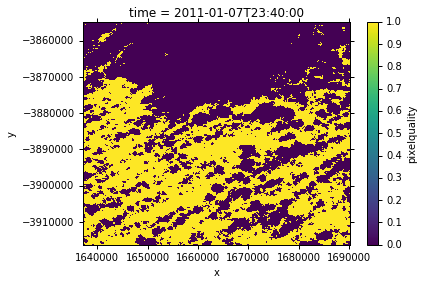

In [29]:
good_data = masking.make_mask(pq, cloud_fmask='no_cloud')
autumn_good_data = good_data.pixelquality.loc['1991-3':'2017-5']
autumn_good_data.plot()

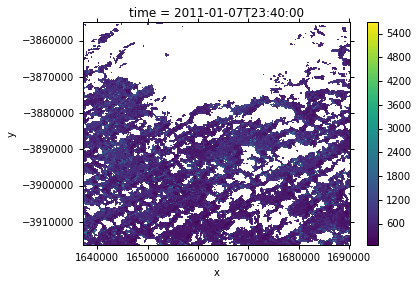

In [30]:
autumn_cloud_free = autumn_valid.where(autumn_good_data)
autumn_cloud_free.plot()

## Group by time
You may have noticed that some of the days above are repeated, with times less than a minute apart.  this is because of the overlap in LANDSAT scenes.  If we group by solar day (a rough local time based on longitude), we can combine these slices:

In [31]:
nbar_by_solar_day = dc.load(product='ls5_nbar_albers', x=(150., 150.5), y=(-34.75, -34.25), group_by='solar_day')
len(nbar_by_solar_day.time)

1

We have fewer times than we did previously.

In [33]:
autumn2 = nbar_by_solar_day.green.loc['1991-3':'2017-5']
autumn2.shape

(1, 2466, 2129)

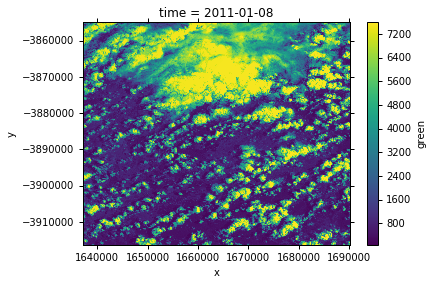

In [35]:
autumn2.plot()

## Some basic band maths
We can combine the `red` and `nir` (_near-infrared_) bands to calculate NDVI (_normalised difference vegetation index_).

In [40]:
two_bands = dc.load(product='ls5_nbar_albers', x=(150., 150.5), y=(-34.75, -34.25), 
                    measurements=['red', 'nir'], group_by='solar_day')
red = two_bands.red.where(two_bands.red != two_bands.red.attrs['nodata'])
nir = two_bands.nir.where(two_bands.nir != two_bands.nir.attrs['nodata'])
pq = dc.load(product='ls5_pq_albers', x=(150., 150.5), y=(-34.75, -34.25), 
             group_by='solar_day')
cloud_free = masking.make_mask(pq, cloud_acca='no_cloud', cloud_fmask='no_cloud', contiguous=True).pixelquality

ndvi = ((nir - red) / (nir + red)).where(cloud_free)

In [41]:
ndvi.shape

(1, 2466, 2129)

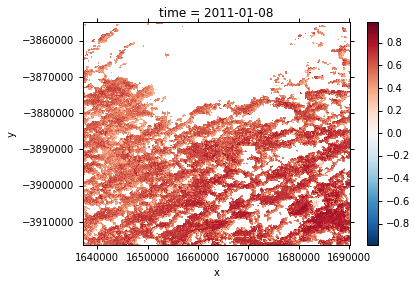

In [42]:
ndvi.plot()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

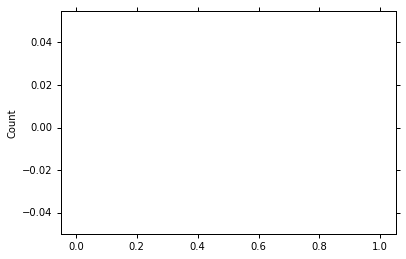

In [44]:
mostly_cloud_free = cloud_free.sum(dim=('x','y')) > (0.75 * cloud_free.size / cloud_free.time.size)
mostly_good_ndvi = ndvi.where(mostly_cloud_free).dropna('time', how='all')
mostly_good_ndvi.plot()

## Some stats

ValueError: zero-size array to reduction operation minimum which has no identity

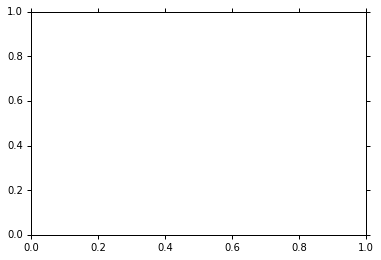

In [45]:
mostly_good_ndvi.median(dim='time').plot()

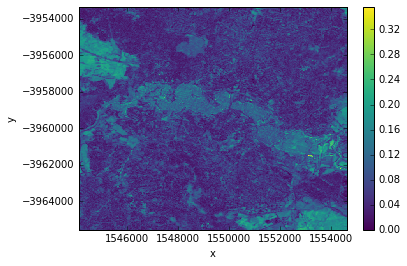

In [24]:
mostly_good_ndvi.std(dim='time').plot()

## Pixel drill

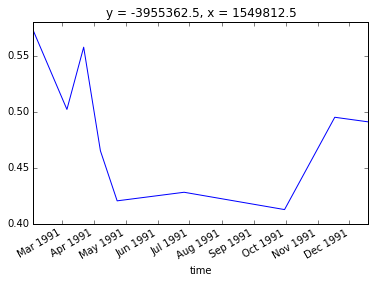

In [25]:
mostly_good_ndvi.sel(y=-3955361, x=1549813, method='nearest').plot()

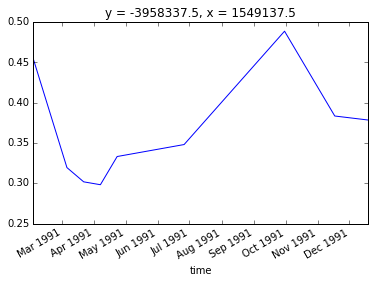

In [26]:
mostly_good_ndvi.isel(x=[200], y=[200]).plot()

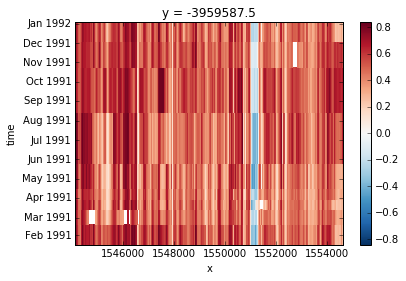

In [27]:
mostly_good_ndvi.isel(y=250).plot()

A line shapefile with pairs of coordinates (using `sel_points` instead of `isel_points`) would be able to be interpolated into something less blocky for the next plot.

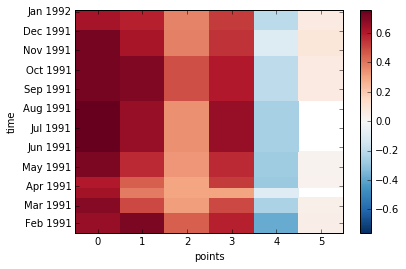

In [28]:
mostly_good_ndvi.isel_points(x=[0, 100, 200, 300, 300, 400], 
                             y=[200, 200, 200, 250, 300, 400]).plot(x='points', y='time')

## Plotting a multi-band image

In [29]:
rgb = dc.load(product='ls5_nbar_albers', 
              x=(149.07, 149.17), y=(-35.25, -35.35), 
              time=('1991-3-1', '1991-6-30'), 
              measurements=['red', 'green', 'blue'], 
              group_by='solar_day', stack='color').transpose('time', 'y', 'x', 'color')
zip(rgb.dims, rgb.shape)

[('time', 6), ('y', 490), ('x', 420), ('color', 3)]

In [30]:
fake_saturation = 3000
clipped_visible = rgb.where(rgb<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

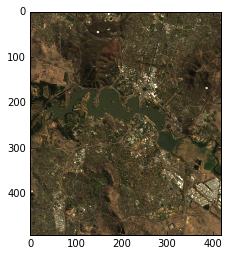

In [31]:
from matplotlib import pyplot as plt
plt.imshow(scaled.isel(time=3))

## Elevation

In [32]:
grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35))
grid.elevation.shape

(1, 361, 361)

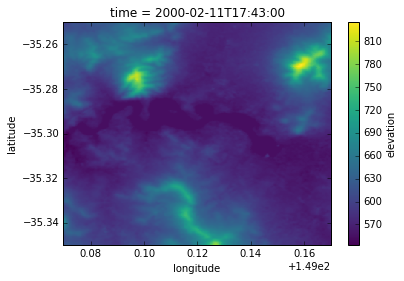

In [33]:
grid.elevation[0].plot()

## Reprojection

In [34]:
albers_grid = dc.load(product='dsm1sv10', x=(149.07, 149.17), y=(-35.25, -35.35), 
                      output_crs='EPSG:3577', resolution=(-25,25))
albers_grid.elevation.shape

(1, 490, 420)

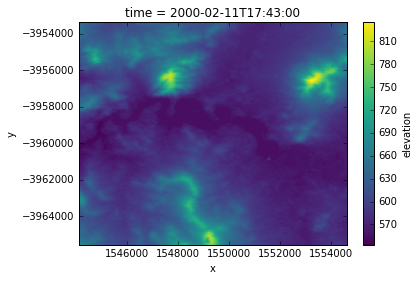

In [35]:
albers_grid.elevation[0].plot()